In [144]:
import numpy as np
import random
from colorama import Fore
from colorama import Style
from queue import PriorityQueue
import heapq
import matplotlib.pyplot as plt
import pandas as pd

In [145]:
def create_grid():
    # Taking input for creating a variable size grid
    height = input("Height: ")
    width = input("Width: ")
    print("Creating Grid\n")
    # Creating a 2D-List for the grid
    grid = [[0 for i in range(int(width))] for j in range(int(height))]
    
    return grid, int(height), int(width)

In [146]:
def populate_grid(game_grid, n, m):
    for i in range(n):
        for j in range(m):
            # placing a random number in range of 0 to 9 on the grid
            game_grid[i][j] = random.randint(0, 9)

    return game_grid

In [147]:
def print_grid(game_grid, n, m):
    for i in range(n):
        print()
        for j in range(m):
            print(" ", game_grid[i][j], end="")
    print("\n")


In [148]:
def path_taken_visual(game_grid, n, m, path):
    # Initialize a counter variable and a flag
    count = 0
    flg = 0

    # Loop through each row in the game grid
    for i in range(n):
        # Print underscores to represent the top border of the cell
        for k in range(m*3):
            print(" ", end="")
        print()

        # Loop through each column in the game grid
        for j in range(m):
            # Check if the current cell is in the path
            for cell in path:
                if (int(cell) == count):
                    flg = 1
            # If the current cell is in the path, print an "@" symbol
            # Otherwise, print the value of the cell
            if (flg == 1):
                print(" ", f"{Fore.RED}@{Style.RESET_ALL}", end="")
                flg = 0
            else:
                print(" ", game_grid[i][j], end="")
            # Increment the counter variable
            count = count + 1
        # Print a vertical bar to represent the right border of the cell
        print(" ")

    # Print underscores to represent the bottom border of the grid
    for k in range(m*3):
        print(" ", end="")
    print("\n")

In this approach the agent start at Grid(0,0) at the left top corner and make it's way down to right bottom corner of the grid. Since we are going downwards and moving from left to right, the agent checks 3 adjacent grid blocks, the one on the right, the one on the bottom and the diagonal one on the right bottom. The agent checks the smallest among the three and moves onto that, until it has reached it's destination at the last cell of the grid.


In [149]:
def shortest_path(game_grid, n, m):
    path_list = []  # a list to store the path the agent takes to reach destination
    next_i = 0
    next_j = 0
    min_num = 99
    print("Current cell is:", game_grid[0][0], "Index i: 0", "Index j: 0")
    for i in range(n):
        for j in range(m):
            if (i == 0 and j == 0):
                current_num = game_grid[i][j]

                # Adding the minimum number to the path list
                path_list.append(0)

                # Checking the cell at the right
                right = game_grid[i][j+1]
                if (min_num >= right):
                    min_num = right
                    next_i = i
                    next_j = j+1
                    print("Choose the cell at right")

                # Checking the cell at bottom
                bottom = game_grid[i+1][j]
                if (min_num >= bottom):
                    min_num = bottom
                    next_i = i+1
                    next_j = j
                    print("Choose the cell at bottom")

                # checking the diagonal cell at the right bottom
                bottom_right = game_grid[i+1][j+1]
                if (min_num >= bottom_right):
                    min_num = bottom_right
                    next_i = i+1
                    next_j = j+1
                    print("Choose the cell at bottom right")
            else:
                # this condition breaks the loop if destination is reached
                if (next_i == n-1 and next_j == m-1):
                    break

                temp_i = next_i
                temp_j = next_j

                current_num = game_grid[next_i][next_j]
                print("Next cell is:", current_num,
                      "Index i:", next_i, "Index j:", next_j)

                # Adding the minimum number to the path list
                path_list.append(((next_i*m)+next_j))

                min_num = 99  # set minimum to a highest number

                # Checking the cell at the right
                if (next_j < m-1):  # checking if not out f bound of the matrix
                    Right = game_grid[next_i][next_j+1]
                    if (min_num >= Right):
                        min_num = Right  # selecting a new minimum number
                        temp_i = next_i
                        temp_j = next_j+1
                        print("Choose the cell at right")

                # Checking the cell at the Bottom
                if (next_i < n-1):  # checking if not out f bound of the matrix
                    Bottom = game_grid[next_i+1][next_j]
                    if (min_num >= Bottom):
                        min_num = Bottom  # selecting a new minimum number
                        temp_i = next_i+1
                        temp_j = next_j
                        print("Choose the cell at Bottom")

                # Checking the cell at the Bottom_Right
                if (next_i < n-1 and next_j < m-1):  # checking if not out f bound of the matrix
                    Bottom_Right = game_grid[next_i+1][next_j+1]
                    if (min_num >= Bottom_Right):
                        min_num = Bottom_Right  # selecting a new minimum number
                        temp_i = next_i+1
                        temp_j = next_j+1
                        print("Choose the cell at Bottom_Right")

                # setting new i and j values
                next_i = temp_i
                next_j = temp_j

    print("Next cell is:", current_num, "Index i:",
          next_i, "Index j:", next_j, "\n\n")
    path_list.append(((next_i*m)+next_j))
    return path_list


In [150]:
# In this function we store the whole grid as a graph. We are going to assign each cell of the grid a number. Suppose if the grid
# is 5x5, that means there are 24 elements in the grid from 0 to 24. we assign each corresponding cell that number, take it's
# 4 neigbours (up,down,left,right), and assign them the the value stored at the position as it's weight or distance, in the
# graph as edges.

def convert_grid_to_graph(grid, h, w):
    grid_graph = {}  # creating dictionary
    count = 0
    for i in range(h):
        for j in range(w):
            grid_graph[str(count)] = {}  # creating nested dictionary

            # top  cell block
            if (i > 0):  # checking if not out of bounds
                up = grid[i-1][j]
                # Storing in the dictionary as a neighbour
                grid_graph[str(count)][str(abs(count-w))] = up

            # bottom  cell block
            if (i < h-1):  # checking if not out of bounds
                down = grid[i+1][j]
                # Storing in the dictionary as a neighbour
                grid_graph[str(count)][str(abs(count+w))] = down

            # right cell block
            if (j < w-1):  # checking if not out of bounds
                right = grid[i][j+1]
                # Storing in the dictionary as a neighbour
                grid_graph[str(count)][str(abs(count+1))] = right

            # left cell block
            if (j > 0):  # checking if not out of bounds
                left = grid[i][j-1]
                # Storing in the dictionary as a neighbour
                grid_graph[str(count)][str(abs(count-1))] = left

            count = count + 1

    return grid_graph


In [151]:
def dijkstra_algo(graph, start, end):
    # distances from the start node to each node
    distance_from_start = {start: 0}
    # nodes that have already been visited
    visited_nodes = set()
    # the previous node in the optimal path from the start node
    previous_node = {start: None}
    # a priority queue to track nodes that still need to be visited, ordered by distance from the start node
    nodes_to_visit = PriorityQueue()
    nodes_to_visit.put((0, start))

    # continue searching while there are still nodes to visit
    while nodes_to_visit:
        # get the next node with the smallest distance from the start node
        current_distance, current_node = nodes_to_visit.get()
        # skip the node if it has already been visited
        if current_node in visited_nodes:
            continue
        # mark the node as visited
        visited_nodes.add(current_node)
        # stop the search if we have reached the end node
        if current_node == end:
            break
        # consider each of the current node's neighbors
        for neighbor, distance in graph[current_node].items():
            # skip already visited neighbors
            if neighbor in visited_nodes:
                continue
            # calculate the distance from the start node to the neighbor through the current node
            distance_through_current = current_distance + distance
            # update the distance from the start node to the neighbor if it is shorter than the current known distance
            current_distance_to_neighbor = distance_from_start.get(
                neighbor, float('inf'))
            if distance_through_current < current_distance_to_neighbor:
                distance_from_start[neighbor] = distance_through_current
                previous_node[neighbor] = current_node
                nodes_to_visit.put((distance_through_current, neighbor))

    return previous_node


In [152]:
def optimal_path_finder(path, end):
    if end not in path:
        return None
    vertex = end
    temp = vertex
    temp_list = []
    temp = temp + vertex
    temp = temp + end
    short_path = []
    while vertex is not None:
        short_path.append(vertex)
        temp = temp + vertex
        vertex = path[vertex]
    return short_path[::-1]


In [153]:
# this function recives the shortest past found, takes the distance on that path, sum that distance and return the total shortest distance
def get_total_dist(shortest_path, Game_Grid):
    path_len = 0
    count = 0
    for i in range(n):
        for j in range(m):
            for d in shortest_path:
                if (count == int(d)):
                    path_len = path_len + Game_Grid[i][j]
            count = count + 1

    return path_len


In [154]:
# this function recives the shortest past found, takes the distance on that path, sum that distance and return the total shortest distance
def get_timeline(shortest_path, Game_Grid):
    path_len = 0
    count = 0
    timestep = []
    for i in range(n):
        for j in range(m):
            for d in shortest_path:
                if (count == int(d)):
                    path_len = path_len + Game_Grid[i][j]
                    timestep.append(path_len)
            count = count + 1

    return timestep


In [155]:
# This function display the index of the of cell, the time step spent on that cell
def print_path_taken(game_grid, n, m, path):
    count = 0
    for i in range(n):
        for j in range(m):
            for cell in path:
                if (count == int(cell)):
                    print("(", i, " , ", j, ")", " : ", game_grid[i][j])
            count = count + 1


In [156]:
# creating the grid as required by the user
game_grid, n, m = create_grid()

print("Game Grid of : ", n, " x ", m)

# This function populates the grid with random values
game_grid = populate_grid(game_grid, n, m)

# printing the grid
print_grid(game_grid, n, m)

Creating Grid

Game Grid of :  10  x  20

  1  3  4  4  2  4  4  1  8  8  7  2  3  0  3  1  3  2  3  3
  9  8  3  2  7  6  1  3  1  6  0  9  9  5  3  1  5  2  4  5
  2  3  9  9  6  6  3  4  2  6  2  3  9  5  1  4  7  3  4  8
  1  3  9  6  7  2  5  3  3  3  9  1  2  5  9  6  8  4  3  0
  8  1  4  7  5  8  7  6  6  2  2  1  4  2  7  2  9  9  7  1
  3  6  0  7  2  9  6  7  0  9  9  2  7  9  7  9  3  4  4  9
  9  9  2  9  3  5  8  0  6  5  6  7  0  2  0  3  0  7  9  7
  5  9  8  4  0  9  0  3  4  4  8  7  7  5  8  7  8  5  2  6
  6  2  7  5  1  0  6  4  5  5  9  1  5  0  3  6  5  0  2  4
  0  4  0  5  4  3  0  1  4  7  6  8  5  2  3  6  9  8  0  8



In [157]:
print("Iterating the grid to find the shortest path using a basic algorithm\n\n")





# Naive approach for shortest path
shortest_path_list = shortest_path(game_grid, n, m)

# uncomment this section of code to see the iteration

'''
print("The shortest path is : ", shortest_path_list, "\n")

print("The path taken in form of (Cell index i, cell index j) : Time step of that cell\n")
print_path_taken(game_grid, n, m, shortest_path_list)

'''

p_len_naieve = get_total_dist(shortest_path_list, game_grid)
print("Total time it took is: ", p_len_naieve, "\n")


Iterating the grid to find the shortest path using a basic algorithm


Current cell is: 1 Index i: 0 Index j: 0
Choose the cell at right
Next cell is: 3 Index i: 0 Index j: 1
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 3 Index i: 1 Index j: 2
Choose the cell at right
Next cell is: 2 Index i: 1 Index j: 3
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 6 Index i: 2 Index j: 4
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 2 Index i: 3 Index j: 5
Choose the cell at right
Next cell is: 5 Index i: 3 Index j: 6
Choose the cell at right
Next cell is: 3 Index i: 3 Index j: 7
Choose the cell at right
Next cell is: 3 Index i: 3 Index j: 8
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 2 Index i: 4 Index j: 9
Choose the cell at right
Next cell is: 2 Index i: 4 Index j: 10
Choose the cell at right
Next cell is: 1 Index i: 4 Index j: 11
Choose the cell at right
Choose the cell at Bottom
Next cell is: 

In [158]:
print("The path taken by naive algorith : \n")
path_taken_visual(game_grid, n, m, shortest_path_list)


The path taken by naive algorith : 

                                                            
  @  @  4  4  2  4  4  1  8  8  7  2  3  0  3  1  3  2  3  3 
                                                            
  9  8  @  @  7  6  1  3  1  6  0  9  9  5  3  1  5  2  4  5 
                                                            
  2  3  9  9  @  6  3  4  2  6  2  3  9  5  1  4  7  3  4  8 
                                                            
  1  3  9  6  7  @  @  @  @  3  9  1  2  5  9  6  8  4  3  0 
                                                            
  8  1  4  7  5  8  7  6  6  @  @  @  4  2  7  2  9  9  7  1 
                                                            
  3  6  0  7  2  9  6  7  0  9  9  @  7  9  7  9  3  4  4  9 
                                                            
  9  9  2  9  3  5  8  0  6  5  6  7  @  @  @  @  @  7  9  7 
                                                            
  5  9  8  4  0  9  0  3  4  4  8  7  7  

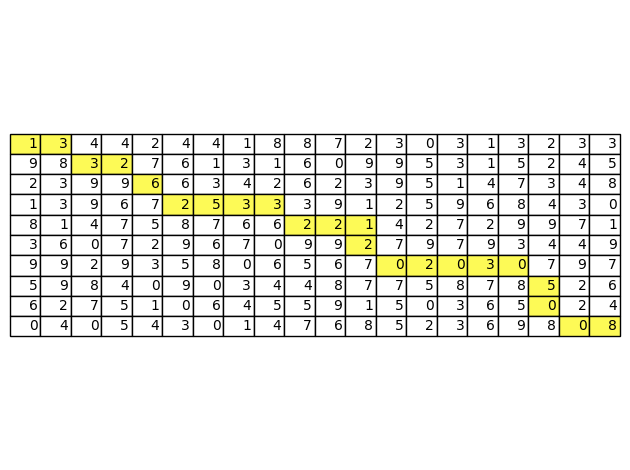

In [159]:
# define figure and axes
fig, ax = plt.subplots()

# hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create data
df = pd.DataFrame(game_grid)

# create table
table = ax.table(cellText=df.values, loc='center')

count = 0
for i in range(n):
    for j in range(m):
        for cell in shortest_path_list:
            if (count == int(cell)):
                table[(i, j)].set_facecolor("#fdfa56")
        count = count + 1

fig.tight_layout()

plt.show()


In [160]:
print("Using Dijkstra's Algorithm to find the shortest optimal path\n")
print("Converting the 2D grid into a graph based on it's neigbours and weights\n")



# converting the 2D grid into graph
grid_graph = convert_grid_to_graph(game_grid, n, m)

# uncomment the following to see the 2D graph being converted

'''
print("Cell no : ", "{", "Neighbouring cell", ":", "Weight""}", "\n")

# loop to print the Grid Graph
for key, val in grid_graph.items():
    print(key, " : ", val)
'''


Using Dijkstra's Algorithm to find the shortest optimal path

Converting the 2D grid into a graph based on it's neigbours and weights



'\nprint("Cell no : ", "{", "Neighbouring cell", ":", "Weight""}", "\n")\n\n# loop to print the Grid Graph\nfor key, val in grid_graph.items():\n    print(key, " : ", val)\n'

In [161]:
print("Running Dijkstra's algorithm on the Graph \n")
end = str((n*m)-1)
path = dijkstra_algo(grid_graph, '0', end)

print("Finding the Optimal Path\n")
shortest_path = optimal_path_finder(path, end)

print("Optimal Path is : ", shortest_path, "\n")

# uncomment the following to see the optimal path for Dijkstra algorithm
'''
print("The path taken in form of (Cell index i, cell index j) : Time step of that cell\n")
print_path_taken(game_grid, n, m, shortest_path)
'''

p_len_dij = get_total_dist(shortest_path, game_grid)
print("Total time it took : ", p_len_dij, "\n")


Running Dijkstra's algorithm on the Graph 

Finding the Optimal Path

Optimal Path is :  ['0', '1', '2', '3', '4', '5', '6', '26', '27', '28', '29', '30', '50', '51', '71', '91', '111', '112', '132', '133', '134', '135', '136', '137', '157', '177', '178', '198', '199'] 

Total time it took :  76 



In [162]:
print("The path taken by Dijkstra algorith : \n")
path_taken_visual(game_grid, n, m, shortest_path)

The path taken by Dijkstra algorith : 

                                                            
  @  @  @  @  @  @  @  1  8  8  7  2  3  0  3  1  3  2  3  3 
                                                            
  9  8  3  2  7  6  @  @  @  @  @  9  9  5  3  1  5  2  4  5 
                                                            
  2  3  9  9  6  6  3  4  2  6  @  @  9  5  1  4  7  3  4  8 
                                                            
  1  3  9  6  7  2  5  3  3  3  9  @  2  5  9  6  8  4  3  0 
                                                            
  8  1  4  7  5  8  7  6  6  2  2  @  4  2  7  2  9  9  7  1 
                                                            
  3  6  0  7  2  9  6  7  0  9  9  @  @  9  7  9  3  4  4  9 
                                                            
  9  9  2  9  3  5  8  0  6  5  6  7  @  @  @  @  @  @  9  7 
                                                            
  5  9  8  4  0  9  0  3  4  4  8  7  

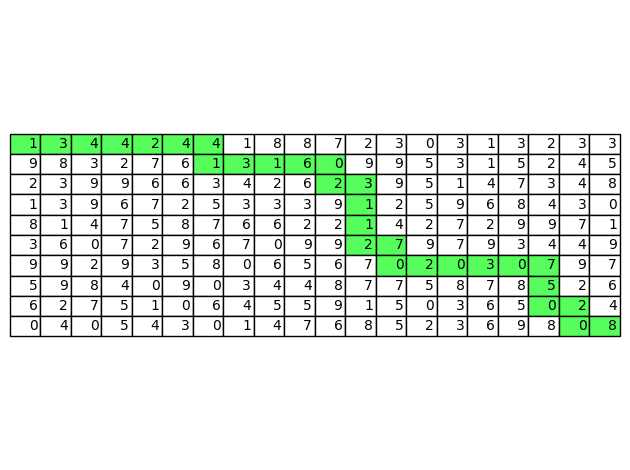

In [163]:
# define figure and axes
fig, ax = plt.subplots()

# hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create data
df = pd.DataFrame(game_grid)

# create table
table = ax.table(cellText=df.values, loc='center')

count = 0
for i in range(n):
    for j in range(m):
        for cell in shortest_path:
            if (count == int(cell)):
                table[(i, j)].set_facecolor("#56fd5c")
        count = count + 1

fig.tight_layout()

plt.show()


In [164]:
time_dij = []
time_naive = []
time_dij = get_timeline(shortest_path, game_grid)
time_naive = get_timeline(shortest_path_list, game_grid)


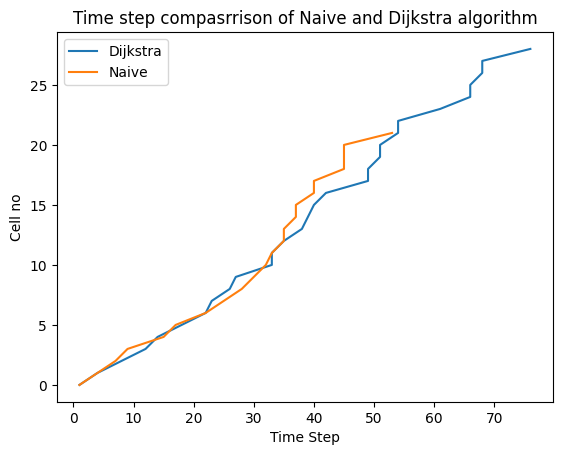

In [165]:
# line of Dijkstra algo
x1 = time_dij
y1 = [x for x in range(len(time_dij))]
plt.plot(x1, y1, label="Dijkstra")

# line of naive algo
x2 = time_naive
y2 = [x for x in range(len(time_naive))]
plt.plot(x2, y2, label="Naive")


plt.xlabel('Time Step')

plt.ylabel('Cell no')

plt.title('Time step compasrrison of Naive and Dijkstra algorithm')

plt.legend()
plt.show()


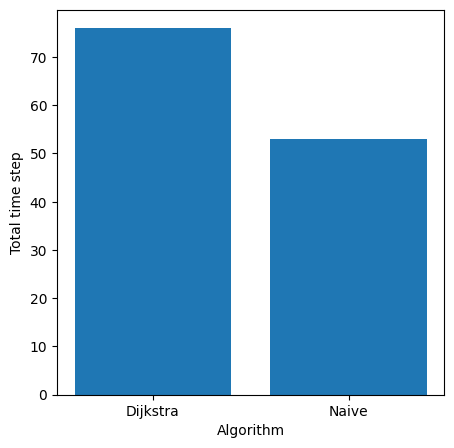

In [166]:
# creating the dataset
data = {'Dijkstra': p_len_dij, 'Naive': p_len_naieve}
Algo = list(data.keys())
Timestep = list(data.values())

fig = plt.figure(figsize=(5, 5))

# creating the bar plot
plt.bar(Algo, Timestep)

plt.xlabel("Algorithm")
plt.ylabel("Total time step")
# plt.title("Students enrolled in different courses")
plt.show()


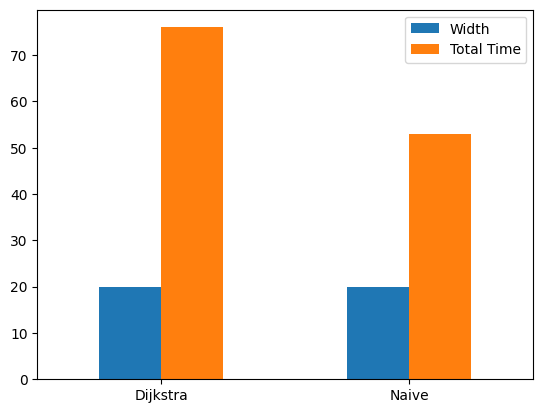

In [167]:
width = [m, m]
Total_time = [p_len_dij, p_len_naieve]
index = ['Dijkstra', 'Naive']
df = pd.DataFrame({'Width': width,
                   'Total Time': Total_time}, index=index)
ax = df.plot.bar(rot=0)


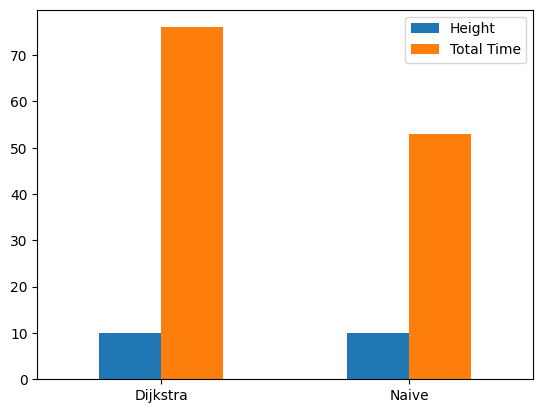

In [168]:
height = [n, n]
Total_time = [p_len_dij, p_len_naieve]
index = ['Dijkstra', 'Naive']
df = pd.DataFrame({'Height': height,
                   'Total Time': Total_time}, index=index)
ax = df.plot.bar(rot=0)


At times the total distance given by naive approach is less than the distance given by Dijkstra. That is because the naive approach moves diagonally and downwards only, straight towards the goal, where as Dijkstra checks all the 8 edges of a cell and move accordingly.
